<a href="https://colab.research.google.com/github/Ly-xinhgai/recommendation-system-using-knn/blob/main/sinh_d%E1%BB%AF_li%E1%BB%87u.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from scipy.stats import zscore
from ruptures import Binseg


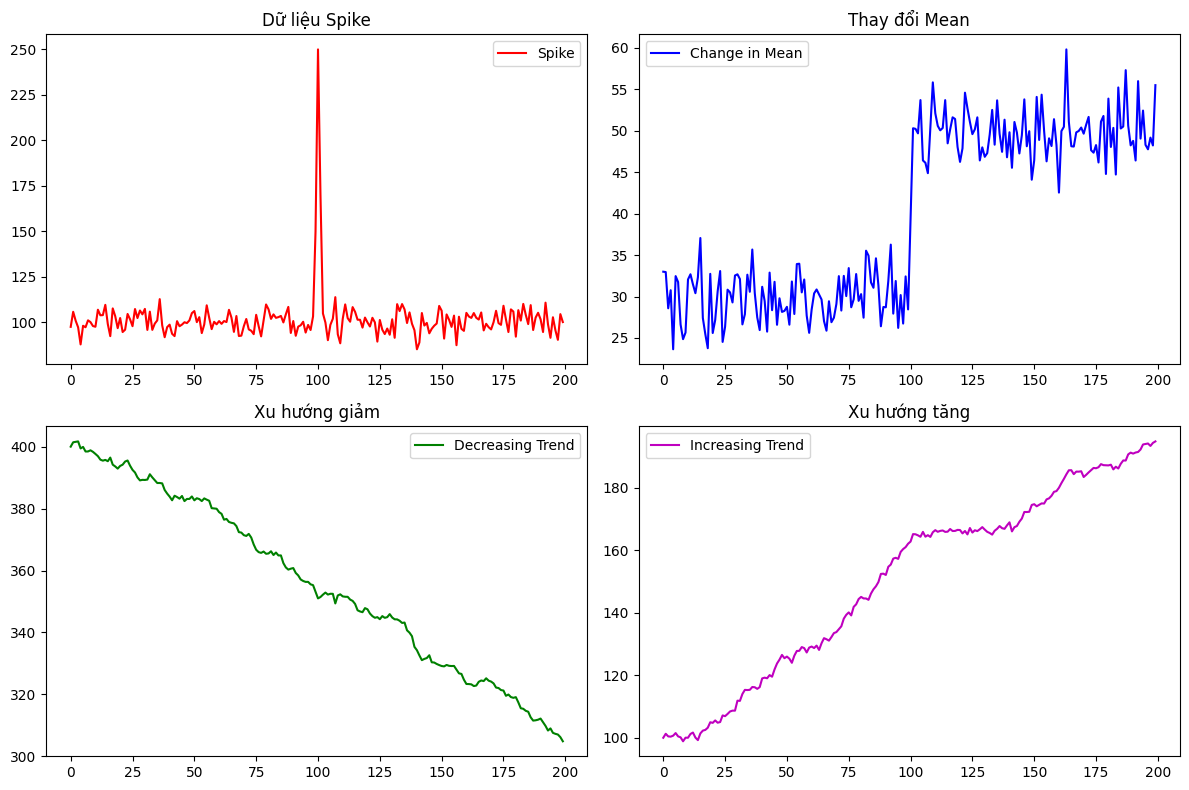

In [14]:

# 1. Sinh Spike
t = np.arange(200)
x_spike = 100 + 5 * np.random.normal(0, 1, 200)
x_spike[99], x_spike[100], x_spike[101] = 150, 250, 170

# 2. Thay đổi mean
x_mean = np.zeros(200)
x_mean[:100] = 30 + 3 * np.random.normal(0, 1, 100)
x_mean[101:] = 50 + 3 * np.random.normal(0, 1, 99)
x_mean[100] = (x_mean[99] + x_mean[101]) / 2

# 3. Xu hướng giảm
x_decreasing = np.zeros(200)
x_decreasing[0] = 400
for i in range(1, 200):
    x_decreasing[i] = x_decreasing[i-1] - 0.5 - np.random.normal(0, 1)

# 4. Xu hướng tăng
x_increasing = np.zeros(200)
x_increasing[0] = 100
for i in range(1, 200):
    x_increasing[i] = x_increasing[i-1] + 0.5 + np.random.normal(0, 1)

# Vẽ biểu đồ
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes[0, 0].plot(t, x_spike, label='Spike', color='r')
axes[0, 0].set_title('Dữ liệu Spike')
axes[0, 0].legend()

axes[0, 1].plot(t, x_mean, label='Change in Mean', color='b')
axes[0, 1].set_title('Thay đổi Mean')
axes[0, 1].legend()

axes[1, 0].plot(t, x_decreasing, label='Decreasing Trend', color='g')
axes[1, 0].set_title('Xu hướng giảm')
axes[1, 0].legend()

axes[1, 1].plot(t, x_increasing, label='Increasing Trend', color='m')
axes[1, 1].set_title('Xu hướng tăng')
axes[1, 1].legend()

plt.tight_layout()
plt.show()


Spike Anomalies at indices: [ 99 100 101]
Mean Change Detected at indices: [100]
General Anomalies at indices: [  0   4   7   8  14  33  99 100 101 199]


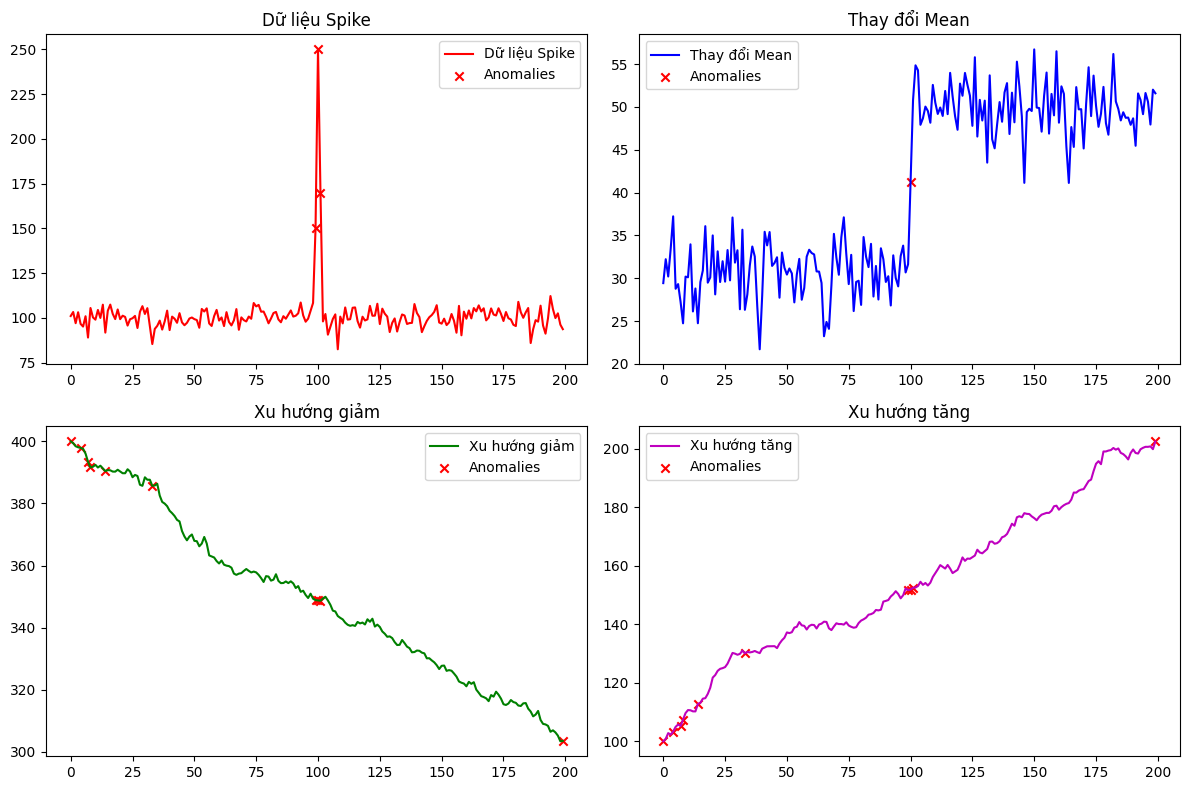

In [12]:


# 1. Sinh Spike
t = np.arange(200)
x_spike = 100 + 5 * np.random.randn(200)
x_spike[99], x_spike[100], x_spike[101] = 150, 250, 170

# Áp dụng Z-score để phát hiện Spike
z_scores = np.abs(zscore(x_spike))
spike_anomalies = np.where(z_scores > 3)[0]
print("Spike Anomalies at indices:", spike_anomalies)

# 2. Thay đổi mean
x_mean = np.zeros(200)
x_mean[:100] = 30 + 3 * np.random.randn(100)
x_mean[101:] = 50 + 3 * np.random.randn(99)
x_mean[100] = (x_mean[99] + x_mean[101]) / 2

# Sử dụng Ruptures để phát hiện thay đổi mean
algo = Binseg(model="l2").fit(x_mean)
mean_change_points = algo.predict(n_bkps=1)
print("Mean Change Detected at indices:", mean_change_points[:-1])

# 3. Xu hướng giảm
x_decreasing = np.zeros(200)
x_decreasing[0] = 400
for i in range(1, 200):
    x_decreasing[i] = x_decreasing[i-1] - 0.5 - np.random.randn()

# 4. Xu hướng tăng
x_increasing = np.zeros(200)
x_increasing[0] = 100
for i in range(1, 200):
    x_increasing[i] = x_increasing[i-1] + 0.5 + np.random.randn()

# Áp dụng Isolation Forest để phát hiện bất thường trên toàn bộ dữ liệu
X = np.vstack([x_spike, x_mean, x_decreasing, x_increasing]).T
model = IsolationForest(contamination=0.05, random_state=42)
labels = model.fit_predict(X)
anomalies = np.where(labels == -1)[0]
print("General Anomalies at indices:", anomalies)

# Vẽ biểu đồ với điểm bất thường
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

def plot_with_anomalies(ax, data, title, color, anomaly_indices=None):
    ax.plot(t, data, label=title, color=color)
    if anomaly_indices is not None:
        ax.scatter(t[anomaly_indices], data[anomaly_indices], color='red', label='Anomalies', marker='x')
    ax.set_title(title)
    ax.legend()

plot_with_anomalies(axes[0, 0], x_spike, 'Dữ liệu Spike', 'r', spike_anomalies)
plot_with_anomalies(axes[0, 1], x_mean, 'Thay đổi Mean', 'b', mean_change_points[:-1])
plot_with_anomalies(axes[1, 0], x_decreasing, 'Xu hướng giảm', 'g', anomalies)
plot_with_anomalies(axes[1, 1], x_increasing, 'Xu hướng tăng', 'm', anomalies)

plt.tight_layout()
plt.show()


Spike Anomalies at indices: [ 99 100 101]
Mean Change Detected at indices: [100]
CUSUM Mean Change Anomalies at indices: [  5  10  16  28  32  35  40  45  52  55  58  63  66  71  78  83  93  98
 100 101 108 115 123 132 142 150 155 160 170 179 194 199   4  15  19  27
  30  36  44  49  53  57  65  67  74  80  84  91  94  96 109 114 117 121
 133 137 144 152 153 158 166 185 196]
General Anomalies at indices: [  0   2   4  10  99 100 101 114 151 199]


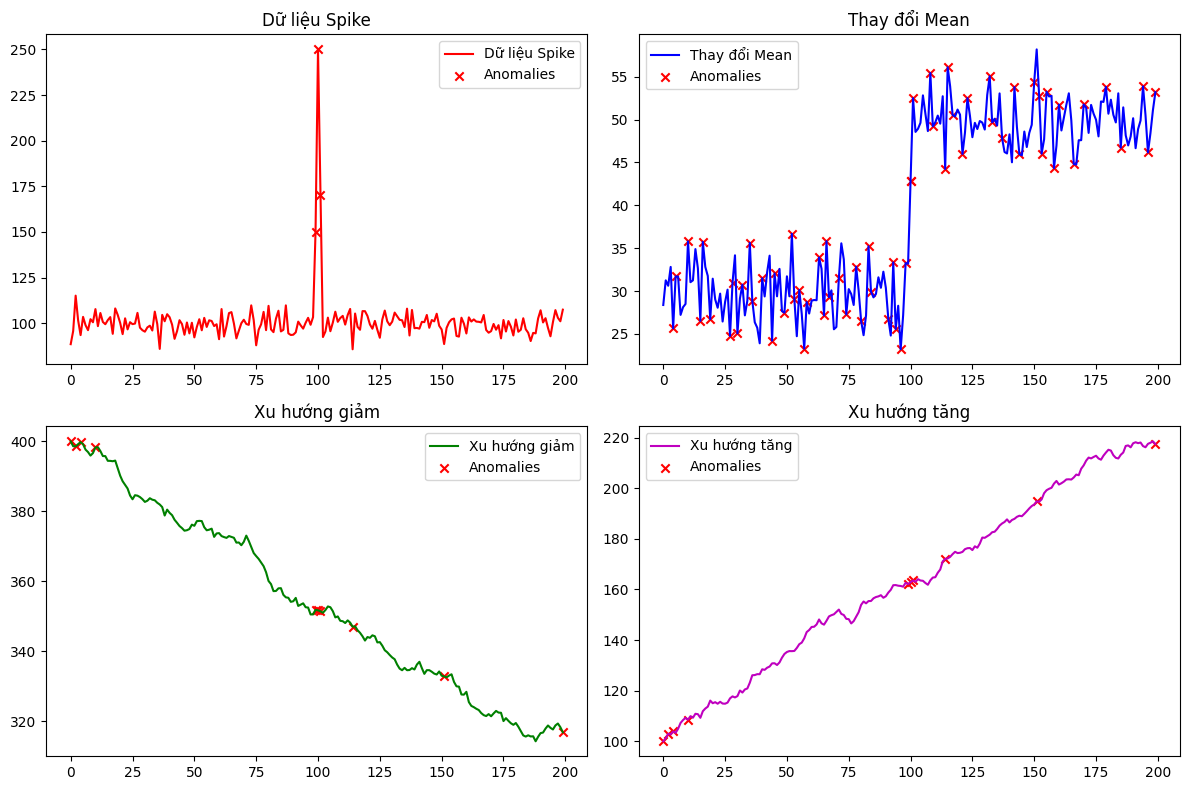

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from scipy.stats import zscore
from ruptures import Binseg
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.robust.scale import mad
from scipy.stats import norm

# 1. Sinh Spike
t = np.arange(200)
x_spike = 100 + 5 * np.random.normal(0, 1, 200)
x_spike[99], x_spike[100], x_spike[101] = 150, 250, 170

# Áp dụng Z-score để phát hiện Spike
z_scores = np.abs(zscore(x_spike))
spike_anomalies = np.where(z_scores > 3)[0]
print("Spike Anomalies at indices:", spike_anomalies)

# 2. Thay đổi mean
x_mean = np.zeros(200)
x_mean[:100] = 30 + 3 * np.random.normal(0, 1, 100)
x_mean[101:] = 50 + 3 * np.random.normal(0, 1, 99)
x_mean[100] = (x_mean[99] + x_mean[101]) / 2

# Sử dụng Ruptures để phát hiện thay đổi mean
algo = Binseg(model="l2").fit(x_mean)
mean_change_points = algo.predict(n_bkps=1)
print("Mean Change Detected at indices:", mean_change_points[:-1])

# Áp dụng CUSUM để phát hiện thay đổi mean
def detect_cusum(x, threshold=5, drift=0.02):
    pos, neg = np.zeros_like(x), np.zeros_like(x)
    pos_cp, neg_cp = [], []

    for i in range(1, len(x)):
        pos[i] = max(0, pos[i-1] + x[i] - x[i-1] - drift)
        neg[i] = max(0, neg[i-1] - (x[i] - x[i-1]) - drift)

        if pos[i] > threshold:
            pos_cp.append(i)
            pos[i] = 0
        if neg[i] > threshold:
            neg_cp.append(i)
            neg[i] = 0

    return np.array(pos_cp + neg_cp)

cusum_mean_anomalies = detect_cusum(x_mean)
print("CUSUM Mean Change Anomalies at indices:", cusum_mean_anomalies)

# 3. Xu hướng giảm
x_decreasing = np.zeros(200)
x_decreasing[0] = 400
for i in range(1, 200):
    x_decreasing[i] = x_decreasing[i-1] - 0.5 - np.random.normal(0, 1)

# 4. Xu hướng tăng
x_increasing = np.zeros(200)
x_increasing[0] = 100
for i in range(1, 200):
    x_increasing[i] = x_increasing[i-1] + 0.5 + np.random.normal(0, 1)

# Áp dụng Isolation Forest để phát hiện bất thường trên toàn bộ dữ liệu
X = np.vstack([x_spike, x_mean, x_decreasing, x_increasing]).T
model = IsolationForest(contamination=0.05, random_state=42)
labels = model.fit_predict(X)
anomalies = np.where(labels == -1)[0]
print("General Anomalies at indices:", anomalies)

# Vẽ biểu đồ với điểm bất thường
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

def plot_with_anomalies(ax, data, title, color, anomaly_indices=None):
    ax.plot(t, data, label=title, color=color)
    if anomaly_indices is not None:
        ax.scatter(t[anomaly_indices], data[anomaly_indices], color='red', label='Anomalies', marker='x')
    ax.set_title(title)
    ax.legend()

plot_with_anomalies(axes[0, 0], x_spike, 'Dữ liệu Spike', 'r', spike_anomalies)
plot_with_anomalies(axes[0, 1], x_mean, 'Thay đổi Mean', 'b', np.concatenate((mean_change_points[:-1], cusum_mean_anomalies)))
plot_with_anomalies(axes[1, 0], x_decreasing, 'Xu hướng giảm', 'g', anomalies)
plot_with_anomalies(axes[1, 1], x_increasing, 'Xu hướng tăng', 'm', anomalies)

plt.tight_layout()
plt.show()


Spike Anomalies at indices: [ 99 100 101]
Isolation Forest Spike Anomalies at indices: [ 35  53  68  76  99 100 101 107 113 178]
Mean Change Detected at indices: [100]
CUSUM Mean Change Anomalies at indices: [ 13  18  23  26  29  31  37  47  53  55  60  71  79  85  91 100 101 110
 113 116 132 141 143 145 147 156 159 165 174 178 185 193 196   3  12  20
  28  30  32  41  50  54  59  65  76  81  98 112 118 131 136 142 144 150
 154 157 163 168 172 176 183 187 191 195 199]
Spike Anomalies at indices: [ 35  53  68  76  99 100 101 107 113 178]
Mean Change Anomalies at indices: [ 12  26  29  79 100 144 147 149 186 199]
Decreasing Trend Anomalies at indices: [  2   8   9 189 190 191 192 196 198 199]
Increasing Trend Anomalies at indices: [  0   1   3   5   6 151 152 153 154 199]


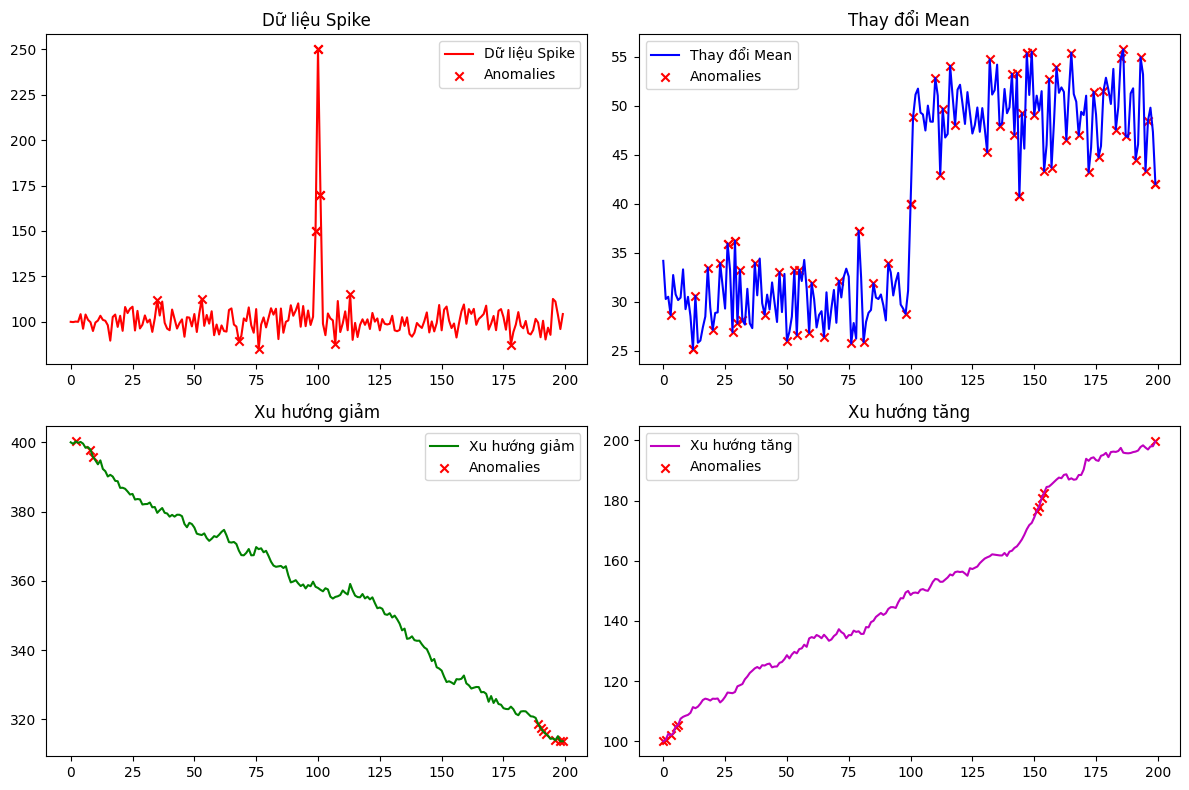

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from scipy.stats import zscore
from ruptures import Binseg
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.robust.scale import mad
from scipy.stats import norm

# 1. Sinh Spike
t = np.arange(200)
x_spike = 100 + 5 * np.random.normal(0, 1, 200)
x_spike[99], x_spike[100], x_spike[101] = 150, 250, 170

# Áp dụng Z-score để phát hiện Spike
z_scores = np.abs(zscore(x_spike))
spike_anomalies = np.where(z_scores > 3)[0]
print("Spike Anomalies at indices:", spike_anomalies)

# Áp dụng Isolation Forest để phát hiện bất thường trong Spike
iso_forest_spike = IsolationForest(contamination=0.05, random_state=42)
labels_spike = iso_forest_spike.fit_predict(x_spike.reshape(-1, 1))
spike_iso_anomalies = np.where(labels_spike == -1)[0]
print("Isolation Forest Spike Anomalies at indices:", spike_iso_anomalies)

# 2. Thay đổi mean
x_mean = np.zeros(200)
x_mean[:100] = 30 + 3 * np.random.normal(0, 1, 100)
x_mean[101:] = 50 + 3 * np.random.normal(0, 1, 99)
x_mean[100] = (x_mean[99] + x_mean[101]) / 2

# Sử dụng Ruptures để phát hiện thay đổi mean
algo = Binseg(model="l2").fit(x_mean)
mean_change_points = algo.predict(n_bkps=1)
print("Mean Change Detected at indices:", mean_change_points[:-1])

# Áp dụng CUSUM để phát hiện thay đổi mean
def detect_cusum(x, threshold=5, drift=0.02):
    pos, neg = np.zeros_like(x), np.zeros_like(x)
    pos_cp, neg_cp = [], []

    for i in range(1, len(x)):
        pos[i] = max(0, pos[i-1] + x[i] - x[i-1] - drift)
        neg[i] = max(0, neg[i-1] - (x[i] - x[i-1]) - drift)

        if pos[i] > threshold:
            pos_cp.append(i)
            pos[i] = 0
        if neg[i] > threshold:
            neg_cp.append(i)
            neg[i] = 0

    return np.array(pos_cp + neg_cp)

cusum_mean_anomalies = detect_cusum(x_mean)
print("CUSUM Mean Change Anomalies at indices:", cusum_mean_anomalies)

# 3. Xu hướng giảm
x_decreasing = np.zeros(200)
x_decreasing[0] = 400
for i in range(1, 200):
    x_decreasing[i] = x_decreasing[i-1] - 0.5 - np.random.normal(0, 1)

# 4. Xu hướng tăng
x_increasing = np.zeros(200)
x_increasing[0] = 100
for i in range(1, 200):
    x_increasing[i] = x_increasing[i-1] + 0.5 + np.random.normal(0, 1)

# Áp dụng Isolation Forest để phát hiện bất thường trên từng chuỗi thời gian
models = {
    'Spike': IsolationForest(contamination=0.05, random_state=42),
    'Mean Change': IsolationForest(contamination=0.05, random_state=42),
    'Decreasing Trend': IsolationForest(contamination=0.05, random_state=42),
    'Increasing Trend': IsolationForest(contamination=0.05, random_state=42)
}

datasets = [x_spike, x_mean, x_decreasing, x_increasing]
anomaly_indices = {}

for (name, model), data in zip(models.items(), datasets):
    labels = model.fit_predict(data.reshape(-1, 1))
    anomaly_indices[name] = np.where(labels == -1)[0]
    print(f"{name} Anomalies at indices:", anomaly_indices[name])

# Vẽ biểu đồ với điểm bất thường
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

def plot_with_anomalies(ax, data, title, color, anomaly_indices=None):
    ax.plot(t, data, label=title, color=color)
    if anomaly_indices is not None:
        ax.scatter(t[anomaly_indices], data[anomaly_indices], color='red', label='Anomalies', marker='x')
    ax.set_title(title)
    ax.legend()

plot_with_anomalies(axes[0, 0], x_spike, 'Dữ liệu Spike', 'r', np.concatenate((spike_anomalies, spike_iso_anomalies)))
plot_with_anomalies(axes[0, 1], x_mean, 'Thay đổi Mean', 'b', np.concatenate((mean_change_points[:-1], cusum_mean_anomalies, anomaly_indices['Mean Change'])))
plot_with_anomalies(axes[1, 0], x_decreasing, 'Xu hướng giảm', 'g', anomaly_indices['Decreasing Trend'])
plot_with_anomalies(axes[1, 1], x_increasing, 'Xu hướng tăng', 'm', anomaly_indices['Increasing Trend'])

plt.tight_layout()
plt.show()
